<a href="https://colab.research.google.com/github/Chathurya99/Pose_Fit_FYP/blob/master/workout_jumpingjacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workout Classification - Tensorflow



## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Download Data

In [ ]:
# Upload first your data before execute these code below
path_workout = "/content/jumpingJackNew.csv"; # change this
path_other = "/content/dancingNew.csv"; # change this
name_class = "Jumping_Jacks" # change this
# change resolution if you using video with different resolution
resolution = {
    "width": 640,
    "height": 360
}

In [ ]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [ ]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,321.248016,139.277496,325.869110,132.915558,316.078247,133.643280,330.924255,136.672424,308.645264,138.179733,...,306.884674,244.678635,330.317993,313.236847,310.008575,314.820984,332.216553,374.321472,313.770447,371.801758
1,319.935608,118.578667,324.547913,112.272881,314.206146,112.689972,331.021301,115.454697,307.914734,117.250938,...,306.241577,250.420013,331.317139,332.760712,311.677856,332.867981,332.462097,403.685974,314.829285,405.729523
2,320.484283,125.442825,325.046326,118.119705,314.866913,118.693443,331.044556,121.981399,307.617584,123.959396,...,305.038147,247.515961,330.685486,327.079864,309.814514,327.442688,332.443420,395.350525,314.737610,397.199432
3,320.197174,121.857735,324.647461,114.825966,314.587158,115.532295,330.516357,117.198723,308.200440,119.764542,...,305.421936,249.640472,330.793945,328.900971,311.308044,329.595398,332.098206,398.950440,315.291687,400.149567
4,320.889282,123.750755,325.396851,117.151032,315.073975,117.575058,330.859650,119.275879,308.241730,121.727600,...,305.081604,248.552078,330.839966,328.108124,310.858459,328.800781,332.359985,398.233582,314.849915,399.706390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,319.213409,115.692612,323.876953,108.302712,314.499939,108.284332,328.345520,113.091118,309.052094,114.205574,...,304.769775,251.964935,331.212280,327.079987,308.917328,326.177551,332.310761,397.135651,312.243958,396.805939
3472,317.310547,115.613098,321.665833,109.313995,312.992432,109.439415,327.799072,112.737312,309.464050,113.773621,...,303.673706,253.288757,331.101074,333.453522,307.048828,331.901581,329.504822,405.978455,311.058044,401.989014
3473,317.663513,120.852196,321.469971,112.855232,313.306030,113.513481,327.196289,115.653755,309.649597,116.386192,...,305.805633,251.694458,330.686951,334.333618,307.477966,332.933746,326.171753,407.029114,311.100586,403.972107
3474,318.327637,116.651802,319.786560,110.441826,316.199463,110.502296,322.014282,112.061241,315.649292,112.717445,...,314.070984,249.796936,325.723694,331.685028,315.314697,331.881378,322.145386,409.088471,317.303101,404.141693


In [ ]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,283.832428,3.261488,286.616516,2.132464,282.971100,2.140022,291.610474,0.405160,278.714417,-0.175094,...,279.287353,34.606720,297.084228,76.048515,263.216705,73.308006,291.952972,114.293518,250.683868,108.383843
1,291.134003,13.201362,296.236145,12.011653,289.152008,11.517987,298.787964,13.838686,283.981415,12.037097,...,278.720734,75.596214,297.091248,117.803284,260.679932,116.043617,295.309021,136.353622,247.596207,132.339142
2,292.700165,48.347771,296.407288,45.845058,289.456848,45.123451,300.045227,51.192543,285.603516,49.239761,...,278.360535,122.935440,295.779602,163.765427,261.616242,161.691376,295.156006,162.086548,261.474396,162.064529
3,293.455200,92.769463,297.173218,89.518478,290.270019,88.554550,300.732056,95.324837,286.138855,93.366402,...,278.394073,175.964203,303.519440,202.631729,269.606323,201.267471,311.508270,189.915741,270.006287,206.183655
4,294.013336,149.223969,297.651825,145.760773,291.141083,145.013199,301.388367,151.297852,286.986877,149.154602,...,279.398987,237.554321,311.016968,247.752091,279.216919,244.538666,311.418854,248.527161,261.204285,240.725357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,214.987930,185.883179,249.093597,145.899643,187.120178,131.945221,269.952606,159.289917,141.910675,139.503799,...,110.783340,453.774841,306.355377,395.044373,113.587967,378.503540,212.002502,246.425537,193.082901,363.182648
2995,214.256470,186.415649,248.572937,149.617203,185.828720,136.380234,268.772247,165.320068,141.306274,141.561081,...,107.497208,446.277771,304.405212,396.300446,122.048584,365.945679,215.317444,240.598557,209.415710,361.389587
2996,214.027405,185.654068,248.041214,147.201828,185.673233,133.435104,266.915527,163.377762,140.512360,140.352936,...,110.968056,452.410187,303.071411,407.943085,120.689285,366.390503,213.290283,248.292389,206.979767,354.062500
2997,214.034195,186.509277,247.758560,149.364716,185.354324,133.627930,267.928436,162.619293,139.904968,140.348175,...,106.233505,451.780304,300.405395,395.880035,119.988739,374.848633,399.929962,446.529053,210.876236,361.668945


**Important**: Check first, the number of data each class is balance or not.

## Data Understanding

TODO: Coming Soon

## Data Exploration

TODO: Coming Soon

## Data Preparation

In [ ]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,321.248016,139.277496,325.869110,132.915558,316.078247,133.643280,330.924255,136.672424,308.645264,138.179733,...,244.678635,330.317993,313.236847,310.008575,314.820984,332.216553,374.321472,313.770447,371.801758,Jumping_Jacks
1,319.935608,118.578667,324.547913,112.272881,314.206146,112.689972,331.021301,115.454697,307.914734,117.250938,...,250.420013,331.317139,332.760712,311.677856,332.867981,332.462097,403.685974,314.829285,405.729523,Jumping_Jacks
2,320.484283,125.442825,325.046326,118.119705,314.866913,118.693443,331.044556,121.981399,307.617584,123.959396,...,247.515961,330.685486,327.079864,309.814514,327.442688,332.443420,395.350525,314.737610,397.199432,Jumping_Jacks
3,320.197174,121.857735,324.647461,114.825966,314.587158,115.532295,330.516357,117.198723,308.200440,119.764542,...,249.640472,330.793945,328.900971,311.308044,329.595398,332.098206,398.950440,315.291687,400.149567,Jumping_Jacks
4,320.889282,123.750755,325.396851,117.151032,315.073975,117.575058,330.859650,119.275879,308.241730,121.727600,...,248.552078,330.839966,328.108124,310.858459,328.800781,332.359985,398.233582,314.849915,399.706390,Jumping_Jacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,319.213409,115.692612,323.876953,108.302712,314.499939,108.284332,328.345520,113.091118,309.052094,114.205574,...,251.964935,331.212280,327.079987,308.917328,326.177551,332.310761,397.135651,312.243958,396.805939,Jumping_Jacks
3472,317.310547,115.613098,321.665833,109.313995,312.992432,109.439415,327.799072,112.737312,309.464050,113.773621,...,253.288757,331.101074,333.453522,307.048828,331.901581,329.504822,405.978455,311.058044,401.989014,Jumping_Jacks
3473,317.663513,120.852196,321.469971,112.855232,313.306030,113.513481,327.196289,115.653755,309.649597,116.386192,...,251.694458,330.686951,334.333618,307.477966,332.933746,326.171753,407.029114,311.100586,403.972107,Jumping_Jacks
3474,318.327637,116.651802,319.786560,110.441826,316.199463,110.502296,322.014282,112.061241,315.649292,112.717445,...,249.796936,325.723694,331.685028,315.314697,331.881378,322.145386,409.088471,317.303101,404.141693,Jumping_Jacks


In [ ]:
df_workout = df_workout[:1415]
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,321.248016,139.277496,325.869110,132.915558,316.078247,133.643280,330.924255,136.672424,308.645264,138.179733,...,244.678635,330.317993,313.236847,310.008575,314.820984,332.216553,374.321472,313.770447,371.801758,Jumping_Jacks
1,319.935608,118.578667,324.547913,112.272881,314.206146,112.689972,331.021301,115.454697,307.914734,117.250938,...,250.420013,331.317139,332.760712,311.677856,332.867981,332.462097,403.685974,314.829285,405.729523,Jumping_Jacks
2,320.484283,125.442825,325.046326,118.119705,314.866913,118.693443,331.044556,121.981399,307.617584,123.959396,...,247.515961,330.685486,327.079864,309.814514,327.442688,332.443420,395.350525,314.737610,397.199432,Jumping_Jacks
3,320.197174,121.857735,324.647461,114.825966,314.587158,115.532295,330.516357,117.198723,308.200440,119.764542,...,249.640472,330.793945,328.900971,311.308044,329.595398,332.098206,398.950440,315.291687,400.149567,Jumping_Jacks
4,320.889282,123.750755,325.396851,117.151032,315.073975,117.575058,330.859650,119.275879,308.241730,121.727600,...,248.552078,330.839966,328.108124,310.858459,328.800781,332.359985,398.233582,314.849915,399.706390,Jumping_Jacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,320.913025,94.430092,325.777283,87.862312,314.491516,87.806305,331.944336,91.529449,307.058594,93.293159,...,231.940308,336.294739,303.843720,304.891968,304.767334,340.073792,381.058014,307.225738,385.391693,Jumping_Jacks
1411,318.531067,99.348740,323.893005,92.460678,313.752991,92.645546,331.310486,96.179482,307.335571,97.767136,...,232.467941,333.395447,308.258758,308.920227,307.666565,335.600708,383.521606,312.574005,385.176544,Jumping_Jacks
1412,319.237762,116.856003,324.486420,110.095566,314.093567,110.067345,330.899658,113.265160,307.640747,113.645981,...,240.034698,330.653442,323.299072,310.649536,323.568176,333.621643,394.813599,314.452637,396.314697,Jumping_Jacks
1413,320.274597,117.521668,325.280121,110.119812,315.179962,110.664566,331.382477,112.600716,308.135681,114.362610,...,244.801621,330.839172,324.762299,310.477844,325.717407,332.191223,397.992279,314.764435,397.629547,Jumping_Jacks


In [ ]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,283.832428,3.261488,286.616516,2.132464,282.971100,2.140022,291.610474,0.405160,278.714417,-0.175094,...,34.606720,297.084228,76.048515,263.216705,73.308006,291.952972,114.293518,250.683868,108.383843,other
1,291.134003,13.201362,296.236145,12.011653,289.152008,11.517987,298.787964,13.838686,283.981415,12.037097,...,75.596214,297.091248,117.803284,260.679932,116.043617,295.309021,136.353622,247.596207,132.339142,other
2,292.700165,48.347771,296.407288,45.845058,289.456848,45.123451,300.045227,51.192543,285.603516,49.239761,...,122.935440,295.779602,163.765427,261.616242,161.691376,295.156006,162.086548,261.474396,162.064529,other
3,293.455200,92.769463,297.173218,89.518478,290.270019,88.554550,300.732056,95.324837,286.138855,93.366402,...,175.964203,303.519440,202.631729,269.606323,201.267471,311.508270,189.915741,270.006287,206.183655,other
4,294.013336,149.223969,297.651825,145.760773,291.141083,145.013199,301.388367,151.297852,286.986877,149.154602,...,237.554321,311.016968,247.752091,279.216919,244.538666,311.418854,248.527161,261.204285,240.725357,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,214.987930,185.883179,249.093597,145.899643,187.120178,131.945221,269.952606,159.289917,141.910675,139.503799,...,453.774841,306.355377,395.044373,113.587967,378.503540,212.002502,246.425537,193.082901,363.182648,other
2995,214.256470,186.415649,248.572937,149.617203,185.828720,136.380234,268.772247,165.320068,141.306274,141.561081,...,446.277771,304.405212,396.300446,122.048584,365.945679,215.317444,240.598557,209.415710,361.389587,other
2996,214.027405,185.654068,248.041214,147.201828,185.673233,133.435104,266.915527,163.377762,140.512360,140.352936,...,452.410187,303.071411,407.943085,120.689285,366.390503,213.290283,248.292389,206.979767,354.062500,other
2997,214.034195,186.509277,247.758560,149.364716,185.354324,133.627930,267.928436,162.619293,139.904968,140.348175,...,451.780304,300.405395,395.880035,119.988739,374.848633,399.929962,446.529053,210.876236,361.668945,other


In [ ]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,321.248016,139.277496,325.869110,132.915558,316.078247,133.643280,330.924255,136.672424,308.645264,138.179733,...,244.678635,330.317993,313.236847,310.008575,314.820984,332.216553,374.321472,313.770447,371.801758,Jumping_Jacks
1,319.935608,118.578667,324.547913,112.272881,314.206146,112.689972,331.021301,115.454697,307.914734,117.250938,...,250.420013,331.317139,332.760712,311.677856,332.867981,332.462097,403.685974,314.829285,405.729523,Jumping_Jacks
2,320.484283,125.442825,325.046326,118.119705,314.866913,118.693443,331.044556,121.981399,307.617584,123.959396,...,247.515961,330.685486,327.079864,309.814514,327.442688,332.443420,395.350525,314.737610,397.199432,Jumping_Jacks
3,320.197174,121.857735,324.647461,114.825966,314.587158,115.532295,330.516357,117.198723,308.200440,119.764542,...,249.640472,330.793945,328.900971,311.308044,329.595398,332.098206,398.950440,315.291687,400.149567,Jumping_Jacks
4,320.889282,123.750755,325.396851,117.151032,315.073975,117.575058,330.859650,119.275879,308.241730,121.727600,...,248.552078,330.839966,328.108124,310.858459,328.800781,332.359985,398.233582,314.849915,399.706390,Jumping_Jacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409,214.987930,185.883179,249.093597,145.899643,187.120178,131.945221,269.952606,159.289917,141.910675,139.503799,...,453.774841,306.355377,395.044373,113.587967,378.503540,212.002502,246.425537,193.082901,363.182648,other
4410,214.256470,186.415649,248.572937,149.617203,185.828720,136.380234,268.772247,165.320068,141.306274,141.561081,...,446.277771,304.405212,396.300446,122.048584,365.945679,215.317444,240.598557,209.415710,361.389587,other
4411,214.027405,185.654068,248.041214,147.201828,185.673233,133.435104,266.915527,163.377762,140.512360,140.352936,...,452.410187,303.071411,407.943085,120.689285,366.390503,213.290283,248.292389,206.979767,354.062500,other
4412,214.034195,186.509277,247.758560,149.364716,185.354324,133.627930,267.928436,162.619293,139.904968,140.348175,...,451.780304,300.405395,395.880035,119.988739,374.848633,399.929962,446.529053,210.876236,361.668945,other


In [ ]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,321.248016,139.277496,325.869110,132.915558,316.078247,133.643280,330.924255,136.672424,308.645264,138.179733,...,306.884674,244.678635,330.317993,313.236847,310.008575,314.820984,332.216553,374.321472,313.770447,371.801758
1,319.935608,118.578667,324.547913,112.272881,314.206146,112.689972,331.021301,115.454697,307.914734,117.250938,...,306.241577,250.420013,331.317139,332.760712,311.677856,332.867981,332.462097,403.685974,314.829285,405.729523
2,320.484283,125.442825,325.046326,118.119705,314.866913,118.693443,331.044556,121.981399,307.617584,123.959396,...,305.038147,247.515961,330.685486,327.079864,309.814514,327.442688,332.443420,395.350525,314.737610,397.199432
3,320.197174,121.857735,324.647461,114.825966,314.587158,115.532295,330.516357,117.198723,308.200440,119.764542,...,305.421936,249.640472,330.793945,328.900971,311.308044,329.595398,332.098206,398.950440,315.291687,400.149567
4,320.889282,123.750755,325.396851,117.151032,315.073975,117.575058,330.859650,119.275879,308.241730,121.727600,...,305.081604,248.552078,330.839966,328.108124,310.858459,328.800781,332.359985,398.233582,314.849915,399.706390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409,214.987930,185.883179,249.093597,145.899643,187.120178,131.945221,269.952606,159.289917,141.910675,139.503799,...,110.783340,453.774841,306.355377,395.044373,113.587967,378.503540,212.002502,246.425537,193.082901,363.182648
4410,214.256470,186.415649,248.572937,149.617203,185.828720,136.380234,268.772247,165.320068,141.306274,141.561081,...,107.497208,446.277771,304.405212,396.300446,122.048584,365.945679,215.317444,240.598557,209.415710,361.389587
4411,214.027405,185.654068,248.041214,147.201828,185.673233,133.435104,266.915527,163.377762,140.512360,140.352936,...,110.968056,452.410187,303.071411,407.943085,120.689285,366.390503,213.290283,248.292389,206.979767,354.062500
4412,214.034195,186.509277,247.758560,149.364716,185.354324,133.627930,267.928436,162.619293,139.904968,140.348175,...,106.233505,451.780304,300.405395,395.880035,119.988739,374.848633,399.929962,446.529053,210.876236,361.668945


In [ ]:
y

,class
0,Jumping_Jacks
1,Jumping_Jacks
2,Jumping_Jacks
3,Jumping_Jacks
4,Jumping_Jacks
...,...
4409,other
4410,other
4411,other
4412,other


In [ ]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [ ]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.501950,0.386882,0.509170,0.369210,0.493872,0.371231,0.517069,0.379646,0.482258,0.383833,...,0.479507,0.679663,0.516122,0.870102,0.484388,0.874503,0.519088,1.039782,0.490266,1.032783
1,0.499899,0.329385,0.507106,0.311869,0.490947,0.313028,0.517221,0.320707,0.481117,0.325697,...,0.478502,0.695611,0.517683,0.924335,0.486997,0.924633,0.519472,1.121350,0.491921,1.127026
2,0.500757,0.348452,0.507885,0.328110,0.491980,0.329704,0.517257,0.338837,0.480652,0.344332,...,0.476622,0.687544,0.516696,0.908555,0.484085,0.909563,0.519443,1.098196,0.491778,1.103332
3,0.500308,0.338494,0.507262,0.318961,0.491542,0.320923,0.516432,0.325552,0.481563,0.332679,...,0.477222,0.693446,0.516866,0.913614,0.486419,0.915543,0.518903,1.108196,0.492643,1.111527
4,0.501390,0.343752,0.508433,0.325420,0.492303,0.326597,0.516968,0.331322,0.481628,0.338132,...,0.476690,0.690422,0.516937,0.911411,0.485716,0.913336,0.519312,1.106204,0.491953,1.110296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409,0.335919,0.516342,0.389209,0.405277,0.292375,0.366515,0.421801,0.442472,0.221735,0.387511,...,0.173099,1.260486,0.478680,1.097345,0.177481,1.051399,0.331254,0.684515,0.301692,1.008841
4410,0.334776,0.517821,0.388395,0.415603,0.290357,0.378834,0.419957,0.459222,0.220791,0.393225,...,0.167964,1.239660,0.475633,1.100835,0.190701,1.016516,0.336434,0.668329,0.327212,1.003860
4411,0.334418,0.515706,0.387564,0.408894,0.290114,0.370653,0.417056,0.453827,0.219551,0.389869,...,0.173388,1.256695,0.473549,1.133175,0.188577,1.017751,0.333266,0.689701,0.323406,0.983507
4412,0.334428,0.518081,0.387123,0.414902,0.289616,0.371189,0.418638,0.451720,0.218602,0.389856,...,0.165990,1.254945,0.469383,1.099667,0.187482,1.041246,0.624891,1.240358,0.329494,1.004636


### One Hot Encoding

In [ ]:
y = pd.get_dummies(y).values
y

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

### Split Dataset

In [ ]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 3531
The number of test data X is: 883
The number of train data y is : 3531
The number of test daya y is : 883
The total dataset is : 4414


## Modelling

In [ ]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,882 (19.07 KB)

 Trainable params: 4,882 (19.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [ ]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [ ]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=120)

Epoch 1/120
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4843 - loss: 0.7370 - val_accuracy: 0.6886 - val_loss: 0.5788
Epoch 2/120
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6769 - loss: 0.5934 - val_accuracy: 0.7995 - val_loss: 0.4189
Epoch 3/120
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7736 - loss: 0.4605 - val_accuracy: 0.9388 - val_loss: 0.2626
Epoch 4/120
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8568 - loss: 0.3477 - val_accuracy: 0.9502 - val_loss: 0.1870
Epoch 5/120
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9232 - loss: 0.2527 - val_accuracy: 0.9456 - val_loss: 0.1590
Epoch 6/120
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9464 - loss: 0.1948 - val_accuracy: 0.9547 - val_loss: 0.1326
Epoch 7/120
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9570 - loss: 0.1744 - val_accuracy: 0.9547 - val_loss: 0.1215
Epoch 8/120
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9628 - loss: 0.1418 - val_accuracy: 0.9660 - v

## Visualization Acc & Loss

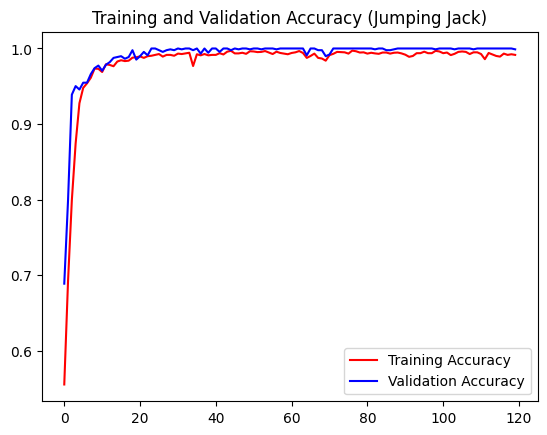

<Figure size 640x480 with 0 Axes>

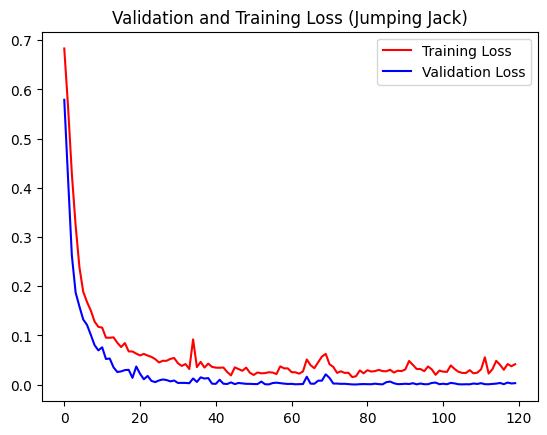

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Jumping Jack)')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss (Jumping Jack)')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.003127277595922351
Test accuracy: 0.9988675117492676


## Test Prediction

In [ ]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
326,0.50078,0.340279,0.508346,0.319114,0.492948,0.321098,0.517282,0.327176,0.481703,0.333704,...,0.476942,0.690006,0.517119,0.910432,0.48615,0.911996,0.51863,1.104649,0.491551,1.111189


In [ ]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : Jumping_Jacks


In [ ]:
df_data['class'].unique()

array(['Jumping_Jacks', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- squat --> Index (1)

In [ ]:
predict_sample = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [ ]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
other


## Export Model

In [ ]:
# Download this file for backup
model.save("model.h5")

In [ ]:
!pip install tensorflowjs

In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/tfjs_float_model_workout

2025-08-28 11:10:12.190887: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756379412.234277   19641 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756379412.246556   19641 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756379412.275348   19641 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756379412.275397   19641 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756379412.275409   19641 computation_placer.cc:177] computation placer alr

In [ ]:
!zip -r /content/tfjs_float_model_workout.zip /content/tfjs_float_model_workout

  adding: content/tfjs_float_model_workout/ (stored 0%)
  adding: content/tfjs_float_model_workout/model.json (deflated 82%)
  adding: content/tfjs_float_model_workout/group1-shard1of1.bin (deflated 7%)


Don't forget to download tfjs model (check relatable folder)